In [1]:
import torch
from transformers import pipeline
from PIL import Image

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("DEVICE: ", device)

DEVICE:  cuda


In [3]:
def view_mask(fg, bg):
    fg_o = fg.convert('RGBA')
    fg_o.putalpha(127)
    bg.paste(fg, (0,0), fg_o)
    return bg

In [7]:
image = Image.open("/home/jasonah/data/road/frame000350.png")

In [8]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
#results

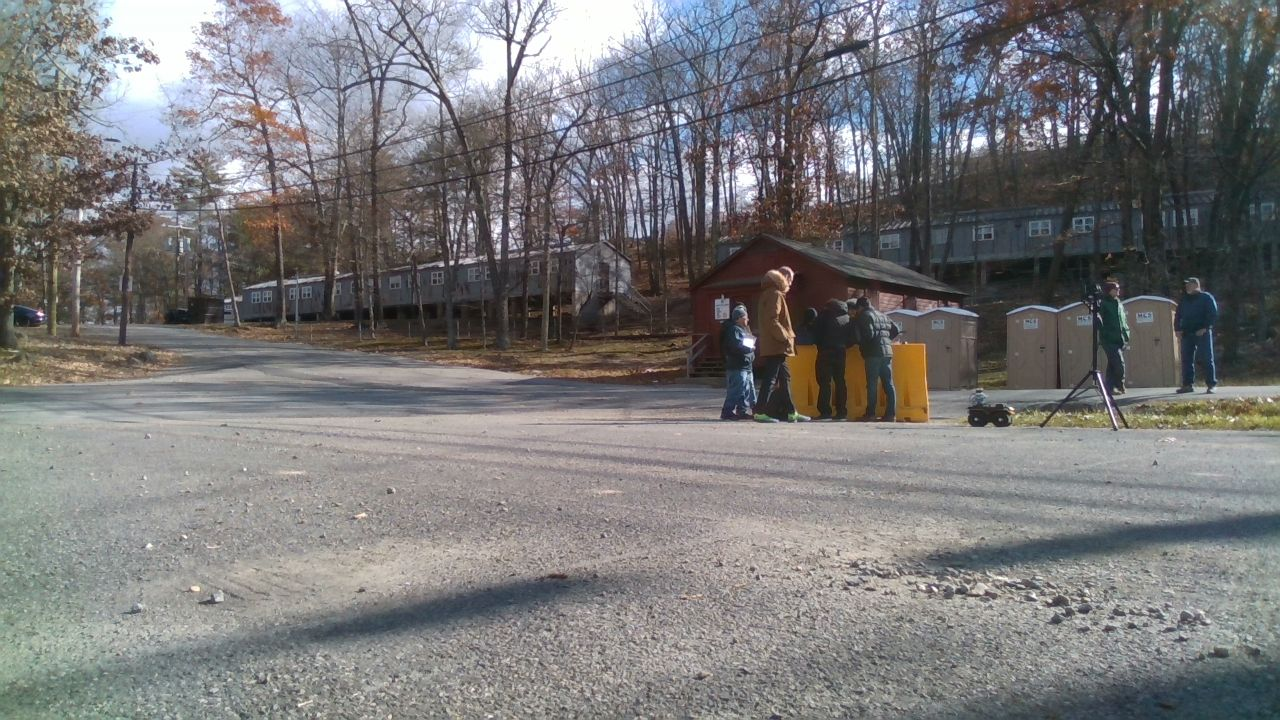

In [9]:
image

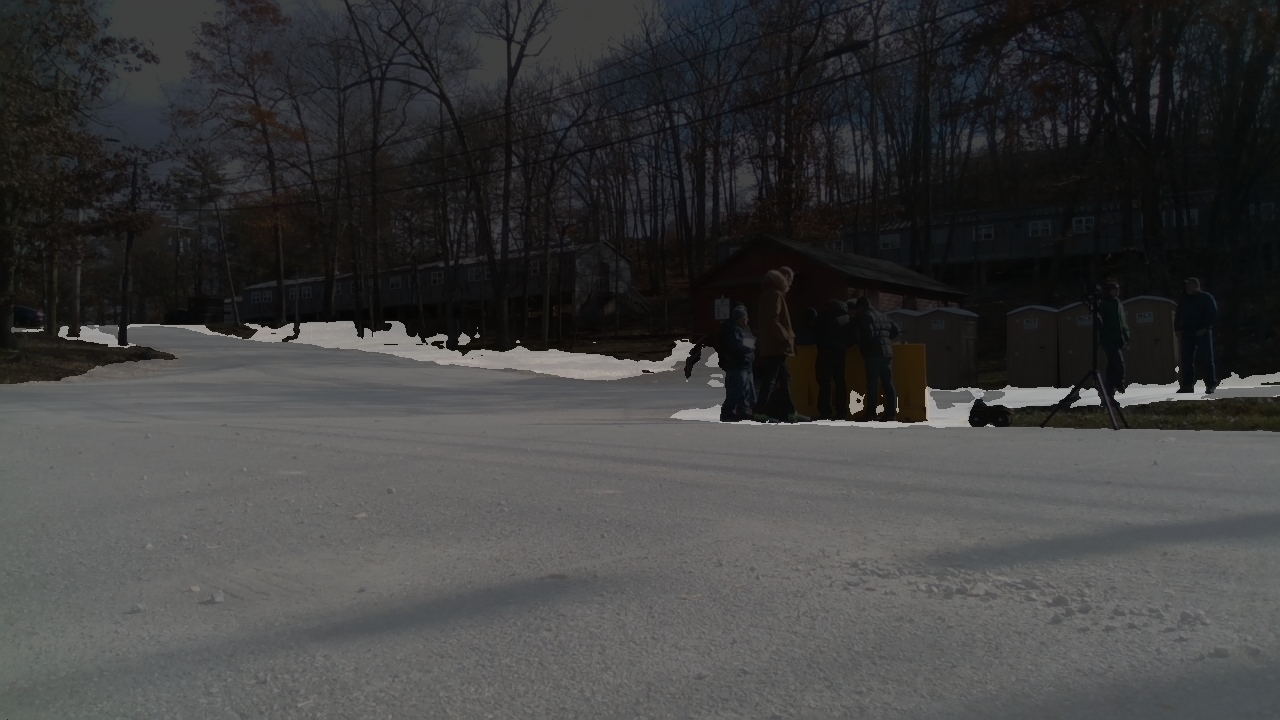

In [11]:
mimg = view_mask(results[0]["mask"], image)
mimg

In [15]:
results

[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'fence',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'traffic light',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=1280x720>},
 {'score': None,
  'label': 'sky',


In [16]:
depth_pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")
image = Image.open("/home/jasonah/data/road/frame000350.png")

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

In [19]:
depth = depth_pipe(image)

In [20]:
depth

{'predicted_depth': tensor([[[ 3.3662,  3.1940,  3.4003,  ...,  3.3842,  3.3897,  2.6234],
          [ 3.3313,  3.4151,  3.4679,  ...,  3.3373,  3.2591,  3.3849],
          [ 3.4708,  3.4686,  3.4701,  ...,  3.3653,  3.3453,  3.4298],
          ...,
          [30.8413, 30.6274, 30.5927,  ..., 32.0794, 32.1500, 32.4731],
          [30.7232, 30.6433, 30.6547,  ..., 32.0203, 32.3636, 32.6341],
          [26.8668, 30.3554, 30.8141,  ..., 31.8105, 32.8057, 29.9208]]]),
 'depth': <PIL.Image.Image image mode=L size=1280x720>}

In [24]:
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.path.dirname(__file__),os.pardir))
sys.path.append(PROJECT_ROOT)

from scripts.plan import ManetPlanner

NameError: name '__file__' is not defined